## KNN classifier

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import  StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [6]:
df = pd.read_csv('data/dataset.csv')
df = df[df['genre'].notnull()]
df.head(5)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade,genre
1,Initials B.B.,Serge Gainsbourg,spotify:track:5hjsmSnUefdUqzsDogisiX,0.498,0.505,3,-12.475,1,0.0337,0.0180,...,0.1760,0.797,101.801,213613,4,48.82510,10,0,60,pop
6,Samba De Uma Nota So (One Note Samba),Antônio Carlos Jobim,spotify:track:62eoocmGk59EMfuRcLBvUL,0.662,0.272,0,-18.883,1,0.0313,0.3600,...,0.0963,0.591,143.507,134360,4,47.82155,7,0,60,jazz
9,I Can Hear Music,The Beach Boys,spotify:track:1hcMfYTsRTC4hIKbfosxjz,0.511,0.603,2,-7.637,1,0.0280,0.0385,...,0.1420,0.685,128.336,157293,4,43.36534,9,1,60,pop
11,Ride Away,Roy Orbison,spotify:track:1nxSCulSg5AtmExqgHPPC0,0.520,0.411,9,-12.411,1,0.0315,0.7860,...,0.1460,0.350,120.290,207573,4,37.54527,9,1,60,pop
13,P.T. 109,Jimmy Dean,spotify:track:3vfNUZeVUiwWXwsEXjagqL,0.746,0.666,2,-10.408,1,0.1460,0.5430,...,0.0488,0.840,94.024,192427,4,78.59848,5,1,60,country


In [7]:
def encode_df(df, le_decade, le_genre):
    df_encoded = df[
        ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
         'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
         'duration_ms', 'chorus_hit', 'decade', 'genre']
    ].copy()
    df_encoded['n_decade'] = le_decade.transform(df_encoded['decade'])
    df_encoded['n_genre'] = le_genre.transform(df_encoded['genre'])
    df_encoded = df_encoded.drop(['genre', 'decade'], axis=1)
    return df_encoded

In [8]:
def split(df):
    return train_test_split(df.drop('n_genre', axis=1), df['n_genre'])

In [10]:
def plot_heatmap(model, X_test, y_test, le_genre):
    y_predict = model.predict(X_test)
    conf_matrix_nb=pd.crosstab(
        le_genre.inverse_transform(y_test),
        le_genre.inverse_transform(y_predict),
        rownames=['Actual'],
        colnames=['Predicted']
    )
    sns.heatmap(conf_matrix_nb)

In [27]:
def fit_summary(model, df):
    le_decade = LabelEncoder()
    le_decade.fit(df.decade)
    le_genre = LabelEncoder()
    le_genre.fit(df.genre)
    df_encoded = encode_df(df, le_decade, le_genre)
    X_train, X_test, y_train, y_test = split(df_encoded)
    model.fit(X_train, y_train)
    plot_heatmap(model, X_test, y_test, le_genre)
    y_predict = model.predict(X_test)
    print(f'Model accuracy score: {model.score(X_test, y_test)}')
    dummy_model = DummyClassifier(strategy='most_frequent')
    dummy_model.fit(X_train, y_train)
    print(f'DummyClassifier accuracy score: {dummy_model.score(X_test, y_test)}')
    print(f'Confusion matrix: \n{confusion_matrix(y_test,y_predict)}')
    print(f'Classification report: \n{classification_report(y_test,y_predict)}')


Model accuracy score: 0.350600748473508
DummyClassifier accuracy score: 0.3533582824502659
Confusion matrix: [[   0    0    0    0    0    0  129   25    0]
 [   0    5    0    6    2    0  446  104    0]
 [   0    1    5    0   17    0  161   70    0]
 [   0    2    0    3    2    1  255  102    0]
 [   0    0    4    3   53    6  204   74    0]
 [   0    3    3    1   11    3  150   69    0]
 [   0   13    3    6   12    1 1366  393    0]
 [   0    9   11    5   36    2  919  345    0]
 [   0    0    1    0    5    0   23    7    0]]
Classification report:               precision    recall  f1-score   support

           0       0.00      0.00      0.00       154
           1       0.15      0.01      0.02       563
           2       0.19      0.02      0.04       254
           3       0.12      0.01      0.02       365
           4       0.38      0.15      0.22       344
           5       0.23      0.01      0.02       240
           6       0.37      0.76      0.50      1794
  

c:\users\tomislav\anaconda3\envs\podatocno_rudarstvo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tomislav\anaconda3\envs\podatocno_rudarstvo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\tomislav\anaconda3\envs\podatocno_rudarstvo\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

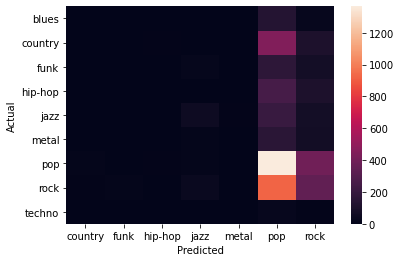

In [39]:
knn_classifier=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,40)}
knn_gscv=GridSearchCV(knn_classifier,param_grid,cv=5)
fit_summary(knn_gscv,df)

In [40]:
knn_gscv.best_params_

{'n_neighbors': 36}

Model accuracy score: 0.5091589521370888
DummyClassifier accuracy score: 0.3509946818987591
Confusion matrix: [[   4    5    3    1   13    1  106   18    0]
 [   1  220    0    1    9    0  269   29    0]
 [   0    3   32   11    5    1  162   53    0]
 [   0   21    1  196    3    2  143   12    1]
 [   3    5    6    3  129    3  159   42    1]
 [   0    1    0    3    3   91   19   91    0]
 [   1  125   10   56   37    6 1240  307    0]
 [   0   84    6    4   29   26  549  672    0]
 [   0    0    1    2    3    3   18   12    1]]
Classification report:               precision    recall  f1-score   support

           0       0.44      0.03      0.05       151
           1       0.47      0.42      0.44       529
           2       0.54      0.12      0.20       267
           3       0.71      0.52      0.60       379
           4       0.56      0.37      0.44       351
           5       0.68      0.44      0.53       208
           6       0.47      0.70      0.56      1782
 

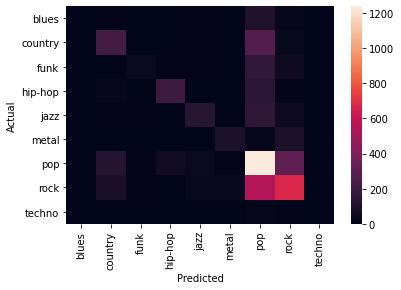

In [41]:
sc=StandardScaler()
df_scaled=df.copy()
df_scaled[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                    'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
                    'duration_ms', 'chorus_hit']]=sc.fit_transform(df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
                                                                                         'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
                                                                                         'duration_ms', 'chorus_hit']])
fit_summary(knn_gscv,df_scaled)

In [42]:
knn_gscv.best_params_

{'n_neighbors': 34}

In [47]:
def plot_validation_curve(estimator, x, y, *, param_name, param_range, cv):
    train_scores, test_scores = validation_curve(
        estimator, x, y, param_name=param_name, param_range=param_range, cv=cv
    )
    train_scores_mean = train_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    test_scores_std = test_scores.std(axis=1)
    plt.title('Validation Curve for Decision Tree Classifier')
    plt.xlabel('max_depth')
    plt.ylabel('Score')
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label='Training score',
                 color='darkorange', lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color='darkorange', lw=lw)
    plt.plot(param_range, test_scores_mean, label='Test score',
                 color='navy', lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color='navy', lw=lw)
    plt.xticks(param_range)
    plt.legend(loc='best')

In [ ]:
le_decade = LabelEncoder()
le_decade.fit(df.decade)
le_genre = LabelEncoder()
le_genre.fit(df.genre)
df_encoded = encode_df(df, le_decade, le_genre)
df_encoded[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'chorus_hit']]=sc.fit_transform(
    df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'instrumentalness', 'acousticness', 'liveness', 'valence', 'tempo',
        'duration_ms', 'chorus_hit']])
X_train, X_test, y_train, y_test = split(df_encoded)
plot_validation_curve(KNeighborsClassifier(),
                      df_encoded.drop(['n_genre'], axis=1),
                      df_encoded['n_genre'],
                      param_name='n_neighbors',
                      param_range=list(range(1,40)),
                      cv=5)

## KNN regression

In [49]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



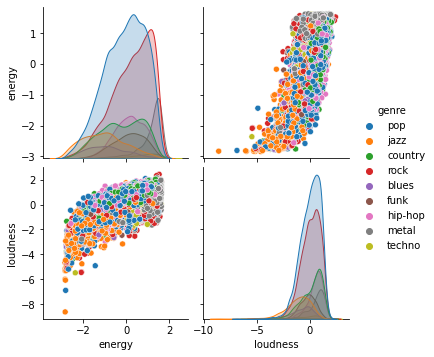

In [56]:
sns.pairplot(df_scaled[['energy','loudness','genre']],hue='genre')

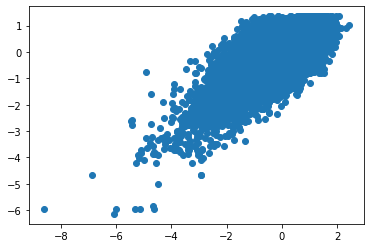

In [64]:
knn_reg=KNeighborsRegressor()
x_set=df_encoded[['energy']]
y_set=df_encoded['loudness']
knn_reg.fit(x_set,y_set)
pred=knn_reg.predict(x_set)
plt.scatter(y_set,pred)
plt.show()
